In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss,mean_squared_error
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from tqdm import tqdm

/opt/conda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Import the train dataset
train = pd.read_csv('train.csv')
train.head()

#Drop two column
train = train.drop(['id', 'number_of_total_atoms'], axis = 1)
print('Number of rows and columns in all data set:',train.shape)

train_labels = train[['formation_energy_ev_natom', 'bandgap_energy_ev']]
train_data = train.drop(['formation_energy_ev_natom', 'bandgap_energy_ev'], axis = 1)
print('Number of rows and columns in train_data data set:',train_data.shape)
print('Number of rows and columns in train_labels data set:',train_labels.shape)

('Number of rows and columns in all data set:', (2400, 12))
('Number of rows and columns in train_data data set:', (2400, 10))
('Number of rows and columns in train_labels data set:', (2400, 2))


In [3]:
#Import the test dataset
test = pd.read_csv('test.csv')
test.head()

#Drop two column
test = test.drop(['id', 'number_of_total_atoms'], axis = 1)
print('Number of rows and columns in all data set:',test.shape)

print('Number of rows and columns in test data set:',test.shape)

('Number of rows and columns in all data set:', (600, 10))
('Number of rows and columns in test data set:', (600, 10))


In [4]:
model = Sequential()
#1 and hidden layer
model.add(Dense(units = 1024, activation = 'relu', kernel_initializer = 'glorot_uniform',input_dim = train_data.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(units = 512, activation = 'relu', kernel_initializer = 'uniform'))
model.add(Dropout(0.1))
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'uniform'))
model.add(Dropout(0.1))
model.add(Dense(units = 2, activation = 'relu', kernel_initializer = 'uniform'))

#compile ANN
model.compile(optimizer = 'adam', loss = 'mse', metrics =['accuracy'])
history = model.fit(train_data, train_labels, batch_size = 3, epochs = 10, validation_split=0.1)

Train on 2160 samples, validate on 240 samples
Epoch 1/10
2160/2160 [==============================] - 5s 2ms/step - loss: 0.5901 - acc: 0.9806 - val_loss: 0.6148 - val_acc: 0.9958
Epoch 2/10
2160/2160 [==============================] - 4s 2ms/step - loss: 0.4346 - acc: 0.9870 - val_loss: 0.1990 - val_acc: 0.9958
Epoch 3/10
2160/2160 [==============================] - 4s 2ms/step - loss: 0.2740 - acc: 0.9870 - val_loss: 0.1821 - val_acc: 0.9958
Epoch 4/10
2160/2160 [==============================] - 4s 2ms/step - loss: 0.1708 - acc: 0.9870 - val_loss: 0.0882 - val_acc: 0.9958
Epoch 5/10
2160/2160 [==============================] - 3s 2ms/step - loss: 0.1730 - acc: 0.9866 - val_loss: 0.1695 - val_acc: 0.9875
Epoch 6/10
2160/2160 [==============================] - 4s 2ms/step - loss: 0.1413 - acc: 0.9870 - val_loss: 0.0400 - val_acc: 0.9958
Epoch 7/10
2160/2160 [==============================] - 3s 2ms/step - loss: 0.1153 - acc: 0.9866 - val_loss: 0.0460 - val_acc: 0.9958
Epoch 8/10
2160

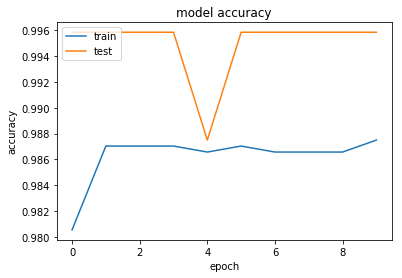

In [5]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

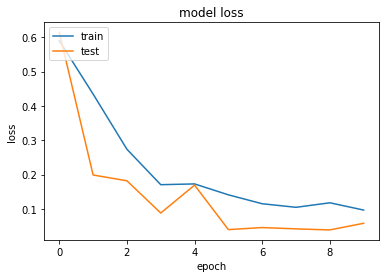

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
def rmsle(y_true,y_pred):
    return np.sqrt(np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean())

In [8]:
rmsle(train_labels, model.predict(train_data))

formation_energy_ev_natom    0.069691
bandgap_energy_ev            0.111719
dtype: float64

In [9]:
test_pred = model.predict(test)
test_pred

array([[0.17323291, 1.4579058 ],
       [0.0425989 , 3.2341633 ],
       [0.06240317, 3.1151357 ],
       ...,
       [0.11628807, 0.8681729 ],
       [0.13281749, 2.0786006 ],
       [0.16771038, 2.0639164 ]], dtype=float32)

In [10]:
submit = pd.DataFrame({'formation_energy_ev_natom':test_pred[:,0],'bandgap_energy_ev':test_pred[:,1]})
submit.to_csv('submission.csv',index=False)

In [11]:
submit.head()

,bandgap_energy_ev,formation_energy_ev_natom
0,1.457906,0.173233
1,3.234163,0.042599
2,3.115136,0.062403
3,2.561793,0.090649
4,1.540434,0.147137


In [12]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)